## Accidentes 

En colombia hay muchos accidentes  de todo tipo, incluidas muertes a causa de los mismos, podriamos pensar que no es importante pero estos accidentes se cobran la vida de
muchas personas, el motivo del siguiente analisis es determinar cuales son los factores que influyen en esto y predecir si existe un comportamiento recurrente en esto y estadisticamente hablando si esto tiene relacion directa con la localidad en la que viven los afectados.

realizando este analisis se pretende promover politicas publicas que ayuden a prevenir diversos acciendente, si determinamos las causas podemos hallar la solucion

### sobre el dataset

en este dataset se encuentras multiples accidentes desde enero de 2010 hasta agosto de 2022
sus causas, el arma o el medio con el cual ocurrio el hecho y por genero-

### Que buscamos con este estudio

cuantas personas por año, mes y dia tienen accidentes
por departamento y municipio?
cuales son los departamentos y munnicipios con la mayor accidentalidad?
cuanto ocurre esto al mes, semana y día?

crear un modelo que permita conocer cuantos accidentes pueden ocurrir en un futuro proximo

## importamos las librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import statsmodels.api as sm

## Cargamos el dataset Lesiones personales y accidentes de transito de la policia nacional

In [5]:
df = pd.read_csv("C:/Users/Jorge/Downloads/Reporte_Lesiones_Personales_y_en_Accidente_de_Tr_nsito_Polic_a_Nacional.csv")
df

C:\Users\Jorge\AppData\Local\Temp\ipykernel_5400\3923234734.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Jorge/Downloads/Reporte_Lesiones_Personales_y_en_Accidente_de_Tr_nsito_Polic_a_Nacional.csv")


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
1,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
2,ANTIOQUIA,MUTATÁ,5480000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
3,ANTIOQUIA,NECOCLÍ,5490000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,1
4,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
...,...,...,...,...,...,...,...,...,...
1047244,CESAR,VALLEDUPAR (CT),20001000,VENENO,3/05/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1047245,HUILA,OPORAPA,41503000,VENENO,16/06/2022,FEMENINO,ADOLESCENTES,LESIONES PERSONALES,1
1047246,TOLIMA,IBAGUÉ (CT),73001000,VENENO,17/04/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1047247,CUNDINAMARCA,COTA,25214000,SIN EMPLEO DE ARMAS,30/03/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1


### Empezamos a entender el dataset

-Miramos desde que fecha hasta que fecha esta el dataset
-Revisamos cuantas columnas y cuantas filas tiene
-Revisamos la calidad de los datos si existen nulos para saber que hacemos con ellos
-Revisamos el formato que tienen las columnas


In [6]:
print(df['FECHA HECHO'].min())
print(df['FECHA HECHO'].max())

1/01/2010
9/12/2021


In [7]:
df.describe(include='object')

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA
count,1047249,1047249,1047249,1047249,1047249,1047249,1046285,1047249
unique,32,1023,2202,45,4626,5,5,2
top,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,1/01/2020,MASCULINO,ADULTOS,LESIONES PERSONALES
freq,134439,61226,50792,368472,1346,592363,853564,748540


In [8]:
df.describe()

,CANTIDAD
count,1.047249e+06
mean,1.617188e+00
std,2.163696e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.140000e+02


In [9]:
df.shape

(1047249, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047249 entries, 0 to 1047248
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   DEPARTAMENTO          1047249 non-null  object
 1   MUNICIPIO             1047249 non-null  object
 2   CODIGO DANE           1047249 non-null  object
 3   ARMAS MEDIOS          1047249 non-null  object
 4   FECHA HECHO           1047249 non-null  object
 5   GENERO                1047249 non-null  object
 6   GRUPO ETARIO          1046285 non-null  object
 7   DESCRIPCIÓN CONDUCTA  1047249 non-null  object
 8   CANTIDAD              1047249 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 71.9+ MB


Vemos que en dataset hay pocos nulos lo cual nos dice que no hay que darle mayor preprocesamiento a los datos y la limpieza que le dé dependerá de las inconsistencias que haya en los datos por lo que miraré el dataset más a fondo

## Data Cleaning: Realizaremos la limpieza de los datos

In [11]:
df['GENERO'].drop_duplicates()

0             FEMENINO
1            MASCULINO
109         NO REPORTA
785327    NO REPORTADO
863052               -
Name: GENERO, dtype: object

Empezamos con la columna 'GENERO' que en primer lugar vemos que tiene algunas inconsistencias, vemos que esta en mayúsculas, y hay tres categorias que significan lo mismo que el sexo no lo reportaron por lo que vamos a unificar eso y pasar todo a minúsculas

In [12]:
dict = {'FEMENINO':'femenino',
    'MASCULINO':'masculino',
    'NO REPORTA':'no reporta',
    'NO REPORTADO':'no reporta',
    '-':'no reporta'}

In [13]:
df['GENERO'] = df['GENERO'].replace(dict)

In [14]:
df['GENERO'].drop_duplicates()

0        femenino
1       masculino
109    no reporta
Name: GENERO, dtype: object

Ya puedo observar que ahora tiene menos categorias y todo esta mas unificado por lo que esta mas legible

In [15]:
df['GRUPO ETARIO'].drop_duplicates()

0              ADULTOS
12        ADOLESCENTES
107            MENORES
132858      NO REPORTA
785327    NO REPORTADO
863052             NaN
Name: GRUPO ETARIO, dtype: object

Ahora continuaré con la columna 'GRUPO ETARIO' donde vemos un campo que esta en nulo y algunas inconsistencias por lo que rellenaremos los campos nulos con 'NO REPORTA' y procederé conunificar esos campos y tranformarlos a minúsculas

In [16]:
df['GRUPO ETARIO'] = df['GRUPO ETARIO'].fillna('NO REPORTA')

In [17]:
dict_1 = {'ADULTOS':'adultos',
'ADOLESCENTES':'adolescentes',
    'MENORES':'menores',
    'NO REPORTA':'no reporta',
    'NO REPORTADO':'no reporta'}

In [18]:
df['GRUPO ETARIO'] = df['GRUPO ETARIO'].replace(dict_1)

In [19]:
df['GRUPO ETARIO'].drop_duplicates()

0              adultos
12        adolescentes
107            menores
132858      no reporta
Name: GRUPO ETARIO, dtype: object

Transformaré la columna 'FECHA HECHO' a formato to_datetime para poder tener nuestro formato de fecha correctamente, esto me permitirá hacer algunas operaciones con estos datos 

In [20]:
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')

Procederé a cambiar los nombres de las columnas a minúsculas para tener mayor comodidad a la hora de hacer operaciones además de darle un formato mas limpio

In [21]:
df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'ARMAS MEDIOS',
       'FECHA HECHO', 'GENERO', 'GRUPO ETARIO', 'DESCRIPCIÓN CONDUCTA',
       'CANTIDAD'],
      dtype='object')

In [22]:
rename_dict = {'DEPARTAMENTO':'departamento', 'MUNICIPIO': 'municipio', 'ARMAS MEDIOS':'armas_medios',
       'FECHA HECHO':'fecha_hecho', 'DESCRIPCIÓN CONDUCTA':'descripción_conducta',
       'CANTIDAD':'cantidad','GENERO':'genero','GRUPO ETARIO':'grupo_etario'}

In [23]:
df = df.rename(columns=(rename_dict))

In [24]:
df

,departamento,municipio,CODIGO DANE,armas_medios,fecha_hecho,genero,grupo_etario,descripción_conducta,cantidad
0,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,femenino,adultos,LESIONES PERSONALES,2
1,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,masculino,adultos,LESIONES PERSONALES,1
2,ANTIOQUIA,MUTATÁ,5480000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,masculino,adultos,LESIONES PERSONALES,1
3,ANTIOQUIA,NECOCLÍ,5490000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,femenino,adultos,LESIONES PERSONALES,1
4,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,femenino,adultos,LESIONES PERSONALES,2
...,...,...,...,...,...,...,...,...,...
1047244,CESAR,VALLEDUPAR (CT),20001000,VENENO,2022-05-03,masculino,adultos,LESIONES PERSONALES,1
1047245,HUILA,OPORAPA,41503000,VENENO,2022-06-16,femenino,adolescentes,LESIONES PERSONALES,1
1047246,TOLIMA,IBAGUÉ (CT),73001000,VENENO,2022-04-17,masculino,adultos,LESIONES PERSONALES,1
1047247,CUNDINAMARCA,COTA,25214000,SIN EMPLEO DE ARMAS,2022-03-30,masculino,adultos,LESIONES PERSONALES,1


In [25]:
df['armas_medios'].drop_duplicates()

0                ARMA BLANCA / CORTOPUNZANTE
104                            ARMA DE FUEGO
152                             CONTUNDENTES
358                                     MOTO
359                               NO REPORTA
364             POLVORA(FUEGOS PIROTECNICOS)
365                                PUNZANTES
437                                 VEHICULO
554                              COMBUSTIBLE
630                                  JERINGA
832                                    PERRO
1030                               BICICLETA
1116      ARTEFACTO EXPLOSIVO/CARGA DINAMITA
1331                        MINA ANTIPERSONA
2034                      SUSTANCIAS TOXICAS
2249                     SIN EMPLEO DE ARMAS
2288                           AGUA CALIENTE
2647                            ESCOPOLAMINA
2648                              OLLA BOMBA
2782                         GRANADA DE MANO
2784                           PAQUETE BOMBA
2994                            MEDICAMENTOS
3726      

Con la columna 'ARMAS MEDIOS' hay categorias que se repiten y también hay muchas categorias como no reportado diferentes por lo que unificaré esas categorias para que sean muchas menos y sea mas legible por lo que reemplazaré algunas por algo mas general 

In [26]:
armas_dict = {'ARMA BLANCA / CORTOPUNZANTE':'cortopunzante',
                            'ARMA DE FUEGO':'arma de fuego',
                            'CONTUNDENTES':'contundentes',
                                    'MOTO':'vehiculo',
                               'NO REPORTA':'no reporta',
             'POLVORA(FUEGOS PIROTECNICOS)':'explosivos',
                                'PUNZANTES':'cortopunzante',
                                'VEHICULO':'vehiculo',
                              'COMBUSTIBLE':'combustible',
                                  'JERINGA':'material medico',
                                    'PERRO':'animales',
                               'BICICLETA':'vehiculo',
       'ARTEFACTO EXPLOSIVO/CARGA DINAMITA':'explosivos',
                        'MINA ANTIPERSONA':'explosivos',
                      'SUSTANCIAS TOXICAS':'sustacias tóxicas',
                     'SIN EMPLEO DE ARMAS':'sin armas',
                           'AGUA CALIENTE':'casero',
                            'ESCOPOLAMINA':'sustancias tóxicas',
                              'OLLA BOMBA':'explosivos',
                         'GRANADA DE MANO':'explosivos',
                           'PAQUETE BOMBA':'explosivos',
                            'MEDICAMENTOS':'material medico',
                                  'VENENO':'sustancias tóxicas',
                                'QUIMICOS':'sustancias tóxicas',
                            'CARRO BOMBA':'explosivos',
                                  'GASES':'sustancias tóxicas',
                        'CINTAS/CINTURON':'materiales',
                  'ARTEFACTO INCENDIARIO':'explosivos',
                         'PAPA EXPLOSIVA':'explosivos',
                     'ALIMENTOS VENCIDOS':'sustancias tóxicas',
                       'LICOR ADULTERADO':'sustancias tóxicas',
                                  'ACIDO':'ácido',
                           'ALUCINOGENOS':'sustancias tóxicas',
                              'ALMOHADA':'materiales',
                        'BOLSA PLASTICA':'materiales',
                             'CORTANTES':'cortopunzante',
                              'CUCHILLA':'cortopunzante',
                               'DIRECTA':'materiales',
                         'ARMAS BLANCAS':'cortopunzante',
                     'PRENDAS DE VESTIR':'materiales',
                        'CILINDRO BOMBA':'explosivos',
                                     '-':'no reporta',
                          'NO REPORTADO':'no reporta',
                        'CINTURON BOMBA':'explosivos',
                       'ARMA TRAUMATICA':'contundentes'}

In [27]:
df['armas_medios'] = df['armas_medios'].replace(armas_dict)

In [28]:
df['departamento'].drop_duplicates()

0                ANTIOQUIA
4                ATLÁNTICO
8                  BOLÍVAR
9                   BOYACÁ
12                  CALDAS
18                 CAQUETÁ
20                   CAUCA
24                   CESAR
25                   CHOCÓ
30                 CÓRDOBA
32            CUNDINAMARCA
39                 GUAJIRA
41                GUAVIARE
42                   HUILA
55               MAGDALENA
56                    META
57                  NARIÑO
60                PUTUMAYO
61                 QUINDÍO
67               RISARALDA
70              SAN ANDRÉS
71               SANTANDER
81                   SUCRE
87                  TOLIMA
91                   VALLE
104               AMAZONAS
161                 ARAUCA
209               CASANARE
283     NORTE DE SANTANDER
357                 VAUPÉS
467                GUAINÍA
2440               VICHADA
Name: departamento, dtype: object

En la columna 'departamento' vemos que todas las categorias estan correctas sin inconsistencias pero para estandarizar todo cambiaremos por minúsculas

In [29]:
df['departamento'] = df['departamento'].str.lower()

Procedo con la columna munucipio con la funcion str.lower() transformé todos los valores en minúscula

In [30]:
df['municipio'].drop_duplicates()

0                 GIRARDOTA
2                    MUTATÁ
3                   NECOCLÍ
4         BARRANQUILLA (CT)
6                    GALAPA
                ...        
294521          MEDIO BAUDÓ
313536           SAN RAFAEL
332866           ALTO BAUDÓ
378296           NO REPORTA
515124              MURINDÓ
Name: municipio, Length: 1023, dtype: object

In [31]:
df['municipio'] = df['municipio'].str.lower()

In [32]:
df['descripción_conducta'].drop_duplicates()

0                                 LESIONES PERSONALES
384    LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )
Name: descripción_conducta, dtype: object

Por ultimo tenemos la columna descripción conducta tambien cambiearemos a minúsculas

In [33]:
desc_dict = {'LESIONES PERSONALES':'lesiones personales', 'LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )':'lesiones culposas'}

In [34]:
df['descripción_conducta'] = df['descripción_conducta'].replace(desc_dict)
df['descripción_conducta'].drop_duplicates()

0      lesiones personales
384      lesiones culposas
Name: descripción_conducta, dtype: object

Ahora veo mas consistencia en el dataframe procederé a eliminar la columna CODIGO DANE ya que esa no me proporciona informacion relevante para el análisis

In [35]:
df

,departamento,municipio,CODIGO DANE,armas_medios,fecha_hecho,genero,grupo_etario,descripción_conducta,cantidad
0,antioquia,girardota,5308000,cortopunzante,2010-01-01,femenino,adultos,lesiones personales,2
1,antioquia,girardota,5308000,cortopunzante,2010-01-01,masculino,adultos,lesiones personales,1
2,antioquia,mutatá,5480000,cortopunzante,2010-01-01,masculino,adultos,lesiones personales,1
3,antioquia,necoclí,5490000,cortopunzante,2010-01-01,femenino,adultos,lesiones personales,1
4,atlántico,barranquilla (ct),8001000,cortopunzante,2010-01-01,femenino,adultos,lesiones personales,2
...,...,...,...,...,...,...,...,...,...
1047244,cesar,valledupar (ct),20001000,sustancias tóxicas,2022-05-03,masculino,adultos,lesiones personales,1
1047245,huila,oporapa,41503000,sustancias tóxicas,2022-06-16,femenino,adolescentes,lesiones personales,1
1047246,tolima,ibagué (ct),73001000,sustancias tóxicas,2022-04-17,masculino,adultos,lesiones personales,1
1047247,cundinamarca,cota,25214000,sin armas,2022-03-30,masculino,adultos,lesiones personales,1


### Eliminamos las columnas innecesarias

In [36]:
df = df.drop(columns=['CODIGO DANE'])
df

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,descripción_conducta,cantidad
0,antioquia,girardota,cortopunzante,2010-01-01,femenino,adultos,lesiones personales,2
1,antioquia,girardota,cortopunzante,2010-01-01,masculino,adultos,lesiones personales,1
2,antioquia,mutatá,cortopunzante,2010-01-01,masculino,adultos,lesiones personales,1
3,antioquia,necoclí,cortopunzante,2010-01-01,femenino,adultos,lesiones personales,1
4,atlántico,barranquilla (ct),cortopunzante,2010-01-01,femenino,adultos,lesiones personales,2
...,...,...,...,...,...,...,...,...
1047244,cesar,valledupar (ct),sustancias tóxicas,2022-05-03,masculino,adultos,lesiones personales,1
1047245,huila,oporapa,sustancias tóxicas,2022-06-16,femenino,adolescentes,lesiones personales,1
1047246,tolima,ibagué (ct),sustancias tóxicas,2022-04-17,masculino,adultos,lesiones personales,1
1047247,cundinamarca,cota,sin armas,2022-03-30,masculino,adultos,lesiones personales,1


### Definimos algunas funcionas para crear algunas columnas que nos permita extraer la informacion que necesitamos

Respondiendo la pregunta de los accidentes por mes defino la funcion MES para obtener el resultado, posteriormente graficaré el resultado y veremos como se comportan los accidente de manera mensual con un grafico de lineas

In [37]:
def MES(df):
    """
    Group accidents by month
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `monthly_accidents`: The grouped Series
    """
    
    # YOUR CODE HERE
    df['fecha_hecho'] = pd.to_datetime(df['fecha_hecho'])
    df['mes'] = df["fecha_hecho"].dt.to_period('M')
    monthly_accidents = df.groupby("mes").size()
    return monthly_accidents

In [38]:
MES(df)

mes
2010-01    5633
2010-02    5028
2010-03    5195
2010-04    5034
2010-05    5030
           ... 
2022-04    5636
2022-05    5946
2022-06    5114
2022-07    5690
2022-08    4843
Freq: M, Length: 152, dtype: int64

Text(0.5, 0, 'Años')

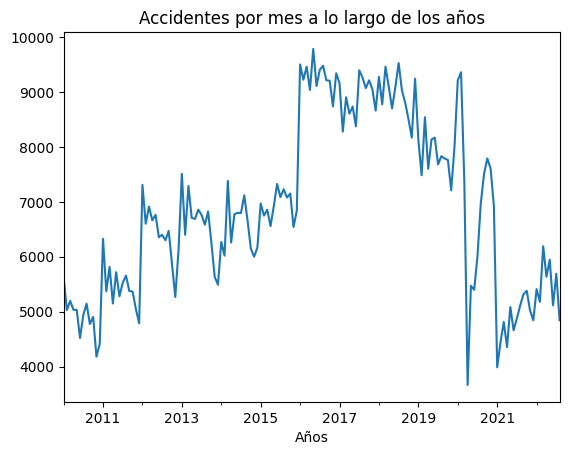

In [39]:
MES(df).plot.line()
plt.title('Accidentes por mes a lo largo de los años')
plt.xlabel('Años')

En el gráfico de lineas para los accidentes por mes se observa que los accidentes venían en general de manera creciente hasta llegar al año 2016 en el cual se dispararon los accidentes en general, luego decrese un poco y para el año 2020 debido a la pandemia bajó sustancialmente el numero de accidentes, aunque despues que empezaron a levantar restricciones creció exponencialmente hasta 2021 y 2022 donde se ha podido observar menos accidentes que años anteriores

### Ahora miraremos como es el comportamiento por dia de la semana

In [40]:
def DIA(df):
    """
    Group accidents by day of the week
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `weekday_accidents`: The grouped Series
    """
    
    # YOUR CODE HERE
    df['dia_semana'] = pd.to_datetime(df['fecha_hecho']).dt.weekday
    weekday_accidents = df.groupby(["dia_semana"]).size()
    return weekday_accidents

In [41]:
DIA(df)

dia_semana
0    148852
1    129427
2    127711
3    125395
4    130263
5    166778
6    218823
dtype: int64

Text(0.5, 1.0, 'Accidentes por dia de la semana')

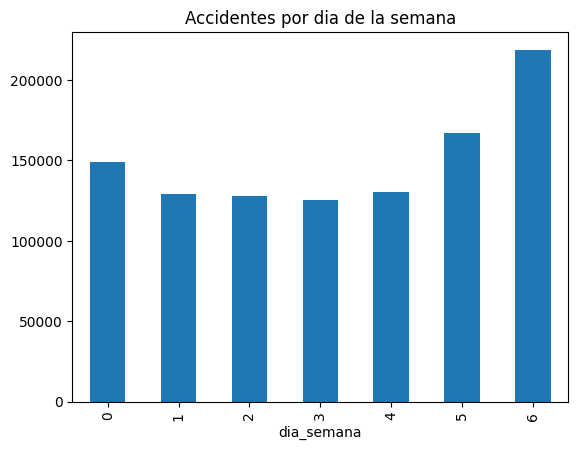

In [42]:
DIA(df).plot.bar()
plt.title('Accidentes por dia de la semana')

En el gráfico de barras se observa como se comportan estos accidentes a lo largo de la semana por los diferentes días partiendo de el lunes donde los accidentes son ligeramente mayores al resto de los dias de la semana donde tienen un comportamiento similar, los fines de semana a partir del sabado donde empieza a crecer y el domingo es donde ocurren la mayor cantidad de accidentes o lesiones personales, por lo tanto podriamos inferir que los fines de semana son los dias de mayor accidentalidad esto podría explicarse debido a los excesos de algunas personas, el abuso de sustancias y todos los peligros que el consumo de esto conlleva, como peleas, conducir en estado de ebriedad, entre muchos otras causas de lesion, siendo esto a considerar mas adelante para determinar las causas reales.

Text(0, 0.5, 'Cantidad (miles)')

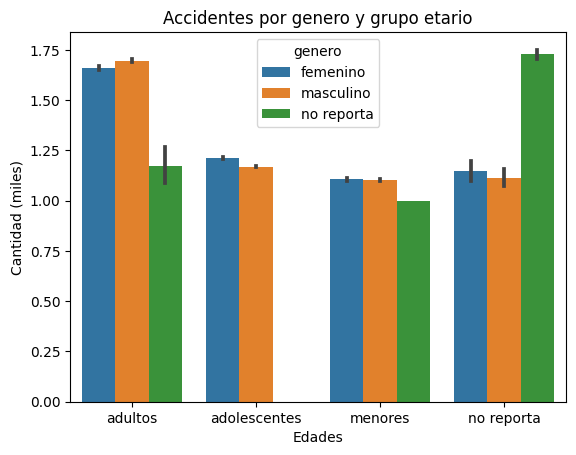

In [43]:
sns.barplot(data=df,x='grupo_etario',y='cantidad',hue='genero')
plt.title('Accidentes por genero y grupo etario')
plt.xlabel('Edades')
plt.ylabel('Cantidad (miles)')

Para obsrvar graficamente como afectaba a la poblacion por genero y grupo etario realicé este grafico de barras que muestra que los accidentes afectan tanto a hombres como a mujeres de maneras muy semejantes siendo los mas afectados el grupo de las personas adultas, entre menores y adolescentes podemos observar que hay poca diferencia en el número de accidentes, y que afecta tanto a niños como a niñas, sin embargo hay muchos accidentes que no se reporta el genero, la edad o ambas cosas, por lo que pueden estar en alguno de estos grupos o generos, sin embargo representa una cantidad de personas importante que han sufrido accidentes de alguna índole.

In [44]:
def DEPARTAMENTO(df):
    """
    Group accidents by borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `boroughs`: The grouped Series
    """
    
    # YOUR CODE HERE
    df['departamento'].drop_duplicates()
    boroughs = df.groupby(['departamento']).size()
    return boroughs

In [45]:
DEPARTAMENTO(df)

departamento
amazonas                2879
antioquia             105105
arauca                  7683
atlántico              43755
bolívar                33979
boyacá                 48113
caldas                 32739
caquetá                11457
casanare               15282
cauca                  28050
cesar                  19384
chocó                   7716
cundinamarca          134439
córdoba                24939
guainía                  922
guajira                13141
guaviare                2108
huila                  42801
magdalena              21103
meta                   33352
nariño                 35336
norte de santander     30889
putumayo                5121
quindío                22149
risaralda              38702
san andrés              4511
santander              85237
sucre                  21188
tolima                 52423
valle                 120891
vaupés                   740
vichada                 1115
dtype: int64

<AxesSubplot: xlabel='departamento'>

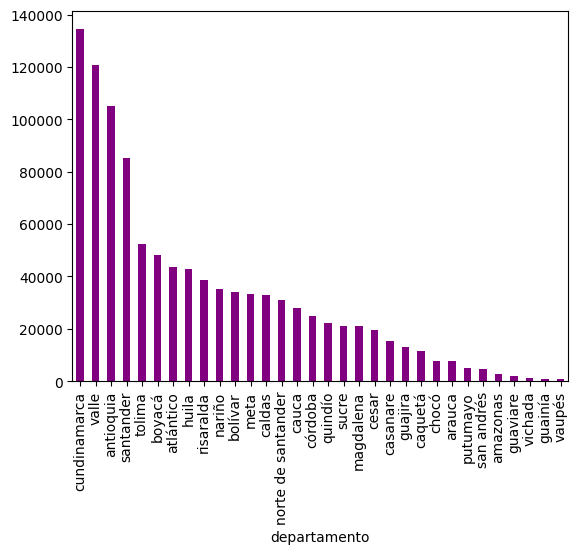

In [46]:
df['departamento'].drop_duplicates()
boroughs = df.groupby(['departamento']).size().sort_values(ascending=False)
boroughs.plot.bar(color='purple')

En la gráfica observamos que los departamentos con mayor accidentalidad son Cundinamarca, Valle, Antioquia, santander y Tolima. Estos son los departamentos con mayor afectación de accidentes en el país

In [47]:
def MUNICIPIO(df):
    """
    Group accidents by borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `boroughs`: The grouped Series
    """
    
    # YOUR CODE HERE
    df['municipio'].drop_duplicates()
    boroughs = df.groupby(['municipio']).size()
    boroughs = boroughs.sort_values(ascending=False).head(15)
    return boroughs

In [48]:
MUNICIPIO(df)

municipio
bogotá d.c. (ct)      61226
cali (ct)             43258
medellín (ct)         32791
bucaramanga (ct)      25020
barranquilla (ct)     23683
ibagué (ct)           21942
pereira (ct)          20335
cartagena (ct)        18492
villavicencio (ct)    18274
pasto (ct)            17970
cúcuta (ct)           17567
manizales (ct)        16083
neiva (ct)            15706
armenia (ct)          12675
palmira               12058
dtype: int64

<AxesSubplot: xlabel='municipio'>

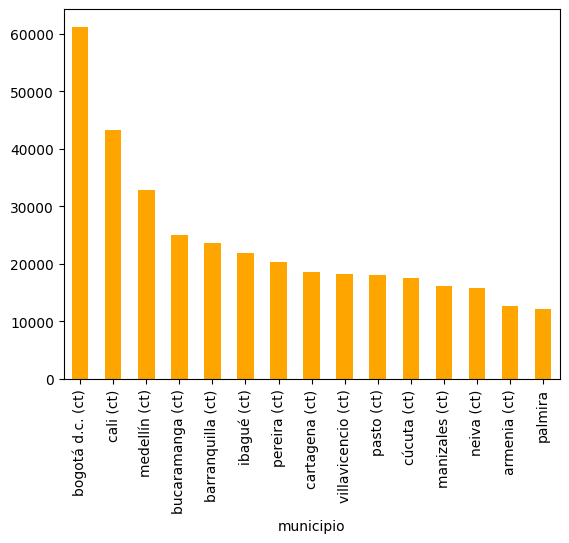

In [49]:
MUNICIPIO(df).plot.bar(color='orange')

In [50]:
def MES_DEPAR(df):
    """
    Calculate accidents per hour for each borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    
    Outputs:
    `bor_hour`: A Series. This should be the result of doing groupby by borough
    and hour.
    """
    
    # YOUR CODE HERE
    df['mes'] = pd.to_datetime(df['fecha_hecho']).dt.to_period('M')
    bor_hour= df.groupby(["departamento","mes"]).size()
    
    return bor_hour

In [51]:
MES_DEPAR(df)

departamento  mes    
amazonas      2010-01    26
              2010-02    25
              2010-03    17
              2010-04    20
              2010-05    23
                         ..
vichada       2022-04     5
              2022-05     7
              2022-06     2
              2022-07     3
              2022-08     4
Length: 4833, dtype: int64

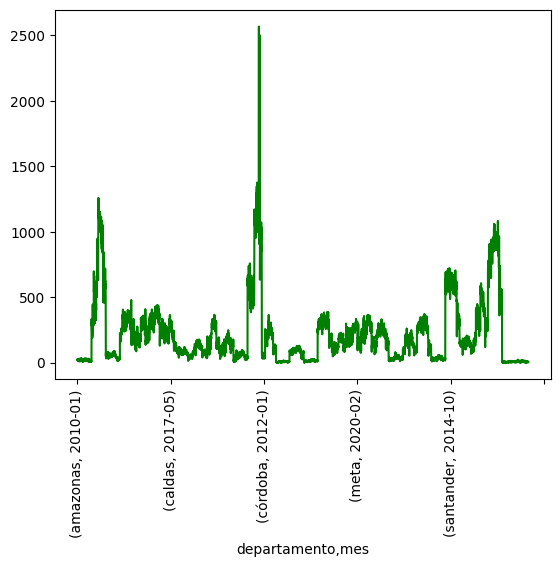

In [52]:
MES_DEPAR(df).plot(color='green')
plt.xticks(rotation=90)
plt.show()

In [53]:
def FACTORES(df):
    """
    Finds which 6 factors cause the most accidents, without 
    double counting the contributing factors of a single accident.
    
    Arguments:
    `contrib_df`: A pandas DataFrame.
    
    Outputs:
    `factors_most_acc`: A pandas DataFrame. It has only 6 elements, which are,
    sorted in descending order, the contributing factors with the most accidents.
    The column with the actual numbers is named `index`.    
    """
    
    # YOUR CODE HERE

    contrib_df = pd.melt(df.reset_index(),id_vars ="index", value_vars= 'armas_medios').dropna()
    contrib_df= contrib_df.drop(columns=['variable'])
    contrib_df = contrib_df.drop_duplicates(keep='first')
    factors_most_acc = contrib_df.groupby('value').count().sort_values(by='index', ascending= False)
    factors_most_acc= factors_most_acc.head(10)
    
    return factors_most_acc

In [54]:
FACTORES(df)

,index
value,
contundentes,369323
vehiculo,265068
cortopunzante,252368
sin armas,54477
arma de fuego,45582
no reporta,38292
ácido,13304
explosivos,3004
animales,2028


<AxesSubplot: xlabel='value'>

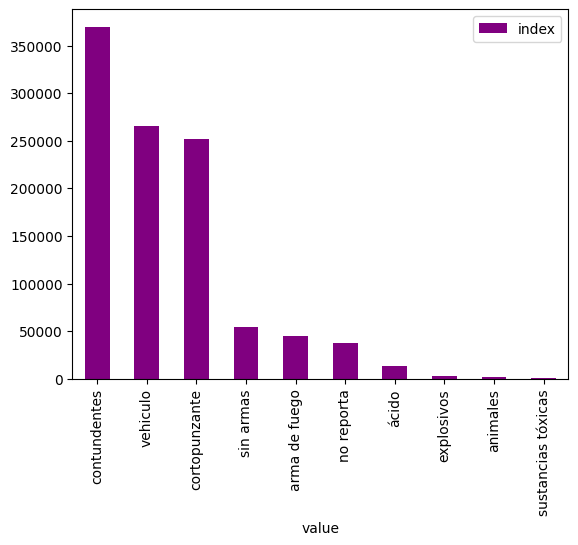

In [55]:
FACTORES(df).plot.bar(color='purple')

In [56]:
contingency = pd.crosstab(index=df['armas_medios'],columns=df['departamento'])
contingency

departamento,amazonas,antioquia,arauca,atlántico,bolívar,boyacá,caldas,caquetá,casanare,cauca,...,putumayo,quindío,risaralda,san andrés,santander,sucre,tolima,valle,vaupés,vichada
armas_medios,,,,,,,,,,,,,,,,,,,,,
animales,18,154,7,30,2,86,69,17,17,41,...,5,71,56,3,198,7,55,178,0,1
arma de fuego,57,4725,260,2849,1165,522,1142,737,376,1643,...,280,1371,1120,264,2117,743,1373,11324,7,28
casero,2,33,2,45,23,18,9,7,5,20,...,3,9,17,1,44,10,17,37,0,1
combustible,1,72,7,20,54,17,14,1,9,21,...,2,11,10,3,38,11,35,54,0,2
contundentes,1937,33281,3104,14714,10574,29376,12127,5611,6466,9187,...,1741,8791,12533,2039,33861,9872,17106,37226,342,311
cortopunzante,453,21509,701,10131,8606,8016,7599,1774,2343,9433,...,1511,3508,5969,721,18091,5937,14812,26852,229,463
explosivos,3,443,175,35,31,23,33,133,19,318,...,94,13,18,0,61,14,60,245,0,4
material medico,5,22,0,20,4,16,13,5,3,12,...,1,3,19,3,34,11,13,59,0,0
materiales,8,54,5,12,21,20,49,6,31,12,...,21,28,11,4,40,3,24,27,0,1


realizaremos la prueba del chi cuadrado para determinar si la hipoptesis nula se cumple o no
nuestra hipotesis nula sera determinada como:
-H0 = las variables son independientes.
-H1 = las variables no son independientes.
-si p < a rechazamos la hipotesis nula.

In [57]:
from scipy.stats import chi2_contingency

In [58]:
p = chi2_contingency(contingency)[1]

if p <= 0.025:
    label = 'Las variables no son independientes'
else:
    label = 'Las variables son independientes'

print(p,label)

0.0 Las variables no son independientes


In [59]:
contingency_2 = pd.crosstab(index=df['genero'],columns=df['armas_medios'])
contingency_2

armas_medios,animales,arma de fuego,casero,combustible,contundentes,cortopunzante,explosivos,material medico,materiales,no reporta,sin armas,sustacias tóxicas,sustancias tóxicas,vehiculo,ácido
genero,,,,,,,,,,,,,,,
femenino,904,6927,263,246,161433,89514,672,208,264,17439,17889,147,685,94918,6240
masculino,908,34929,201,336,176053,153848,2169,124,203,20494,25391,96,730,169817,7064
no reporta,216,3726,0,133,31837,9006,163,33,30,359,11197,13,91,333,0


<AxesSubplot: xlabel='departamento', ylabel='armas_medios'>

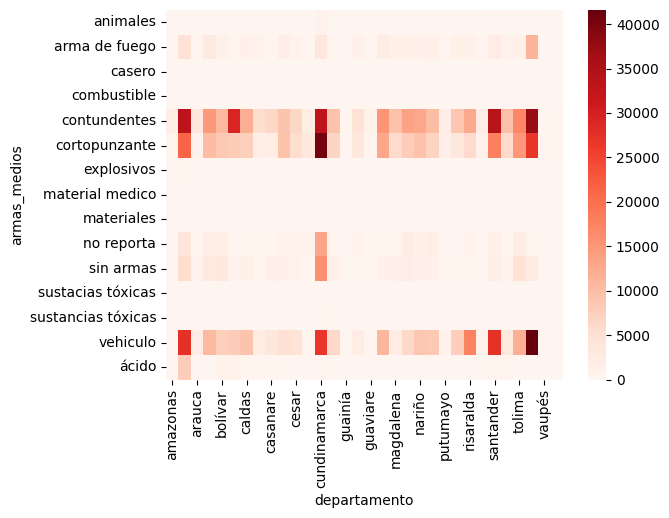

In [60]:
sns.heatmap(contingency, cmap='Reds')

In [61]:
print(df.cantidad.min())
print(df.cantidad.max())
print(df.cantidad.std())
print(df.cantidad.mean())

1
114
2.1636956793957522
1.6171884623427666


In [62]:
contingency_2.describe()

armas_medios,animales,arma de fuego,casero,combustible,contundentes,cortopunzante,explosivos,material medico,materiales,no reporta,sin armas,sustacias tóxicas,sustancias tóxicas,vehiculo,ácido
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000
mean,676.000000,15194.000000,154.666667,238.333333,123107.666667,84122.666667,1001.333333,121.666667,165.666667,12764.000000,18159.000000,85.333333,502.000000,88356.00000,4434.666667
std,398.376706,17165.787748,137.485757,101.716927,79380.016662,72571.351767,1042.762837,87.523330,121.385062,10851.095567,7100.850935,67.633818,356.646884,84932.33452,3862.569784
min,216.000000,3726.000000,0.000000,133.000000,31837.000000,9006.000000,163.000000,33.000000,30.000000,359.000000,11197.000000,13.000000,91.000000,333.00000,0.000000
25%,560.000000,5326.500000,100.500000,189.500000,96635.000000,49260.000000,417.500000,78.500000,116.500000,8899.000000,14543.000000,54.500000,388.000000,47625.50000,3120.000000
50%,904.000000,6927.000000,201.000000,246.000000,161433.000000,89514.000000,672.000000,124.000000,203.000000,17439.000000,17889.000000,96.000000,685.000000,94918.00000,6240.000000
75%,906.000000,20928.000000,232.000000,291.000000,168743.000000,121681.000000,1420.500000,166.000000,233.500000,18966.500000,21640.000000,121.500000,707.500000,132367.50000,6652.000000
max,908.000000,34929.000000,263.000000,336.000000,176053.000000,153848.000000,2169.000000,208.000000,264.000000,20494.000000,25391.000000,147.000000,730.000000,169817.00000,7064.000000


In [63]:
p = chi2_contingency(contingency_2)[1]

if p <= 0.025:
    label = 'Las variables no son independientes'
else:
    label = 'Las variables son independientes'

print(p,label)

0.0 Las variables no son independientes


<AxesSubplot: xlabel='armas_medios', ylabel='genero'>

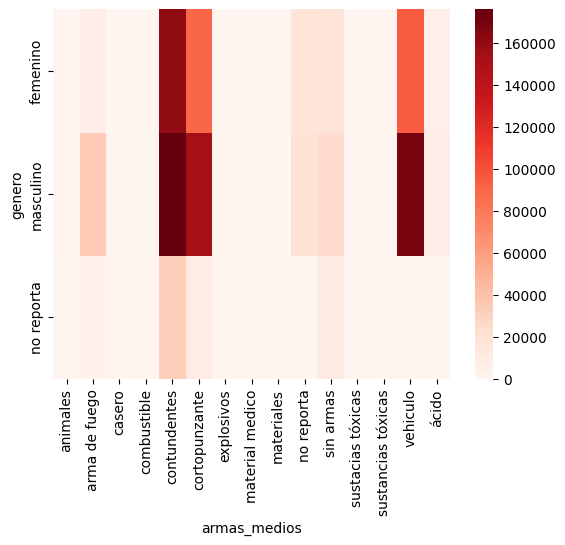

In [64]:
sns.heatmap(contingency_2,cmap='Reds')

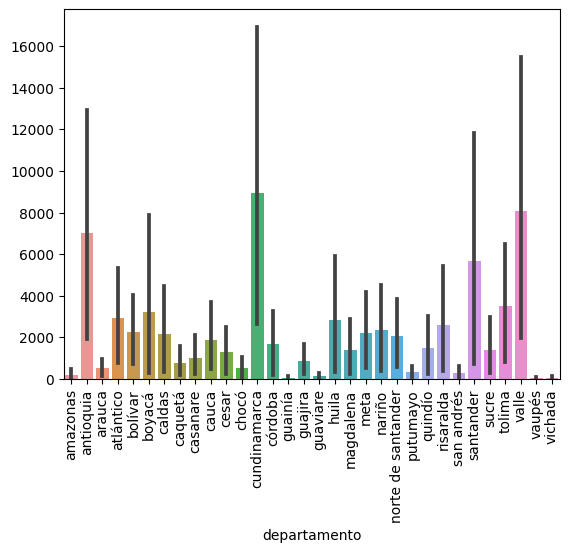

In [112]:
sns.barplot(data=contingency)
plt.xticks(rotation=90)
plt.show()

In [66]:
df

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,descripción_conducta,cantidad,mes,dia_semana
0,antioquia,girardota,cortopunzante,2010-01-01,femenino,adultos,lesiones personales,2,2010-01,4
1,antioquia,girardota,cortopunzante,2010-01-01,masculino,adultos,lesiones personales,1,2010-01,4
2,antioquia,mutatá,cortopunzante,2010-01-01,masculino,adultos,lesiones personales,1,2010-01,4
3,antioquia,necoclí,cortopunzante,2010-01-01,femenino,adultos,lesiones personales,1,2010-01,4
4,atlántico,barranquilla (ct),cortopunzante,2010-01-01,femenino,adultos,lesiones personales,2,2010-01,4
...,...,...,...,...,...,...,...,...,...,...
1047244,cesar,valledupar (ct),sustancias tóxicas,2022-05-03,masculino,adultos,lesiones personales,1,2022-05,1
1047245,huila,oporapa,sustancias tóxicas,2022-06-16,femenino,adolescentes,lesiones personales,1,2022-06,3
1047246,tolima,ibagué (ct),sustancias tóxicas,2022-04-17,masculino,adultos,lesiones personales,1,2022-04,6
1047247,cundinamarca,cota,sin armas,2022-03-30,masculino,adultos,lesiones personales,1,2022-03,2


In [67]:
df = df.set_index('fecha_hecho').reset_index()
df

,fecha_hecho,departamento,municipio,armas_medios,genero,grupo_etario,descripción_conducta,cantidad,mes,dia_semana
0,2010-01-01,antioquia,girardota,cortopunzante,femenino,adultos,lesiones personales,2,2010-01,4
1,2010-01-01,antioquia,girardota,cortopunzante,masculino,adultos,lesiones personales,1,2010-01,4
2,2010-01-01,antioquia,mutatá,cortopunzante,masculino,adultos,lesiones personales,1,2010-01,4
3,2010-01-01,antioquia,necoclí,cortopunzante,femenino,adultos,lesiones personales,1,2010-01,4
4,2010-01-01,atlántico,barranquilla (ct),cortopunzante,femenino,adultos,lesiones personales,2,2010-01,4
...,...,...,...,...,...,...,...,...,...,...
1047244,2022-05-03,cesar,valledupar (ct),sustancias tóxicas,masculino,adultos,lesiones personales,1,2022-05,1
1047245,2022-06-16,huila,oporapa,sustancias tóxicas,femenino,adolescentes,lesiones personales,1,2022-06,3
1047246,2022-04-17,tolima,ibagué (ct),sustancias tóxicas,masculino,adultos,lesiones personales,1,2022-04,6
1047247,2022-03-30,cundinamarca,cota,sin armas,masculino,adultos,lesiones personales,1,2022-03,2


In [68]:
df.to_csv("C:/Users/Jorge/Downloads/Projects/colombian_acc.csv",encoding = 'utf-8')

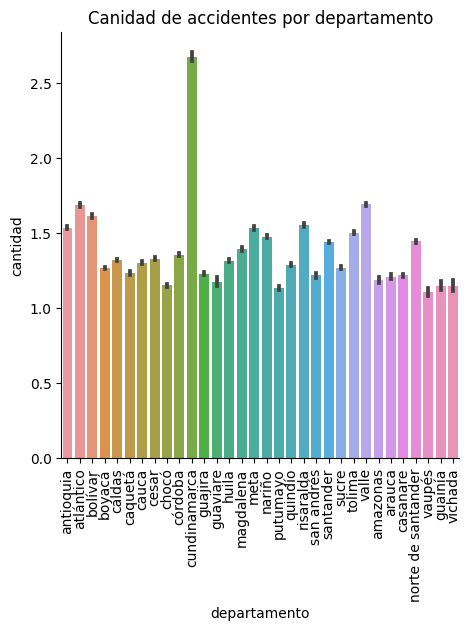

In [108]:
ax = sns.catplot(data=df, x='departamento',y='cantidad',height=5,kind='bar')
plt.title('Canidad de accidentes por departamento')
plt.xticks(rotation=90)
plt.show()

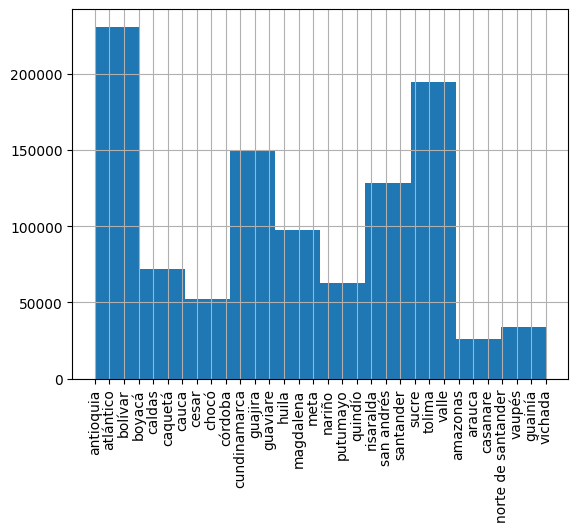

In [110]:
df.departamento.hist()
plt.xticks(rotation=90)
plt.show()

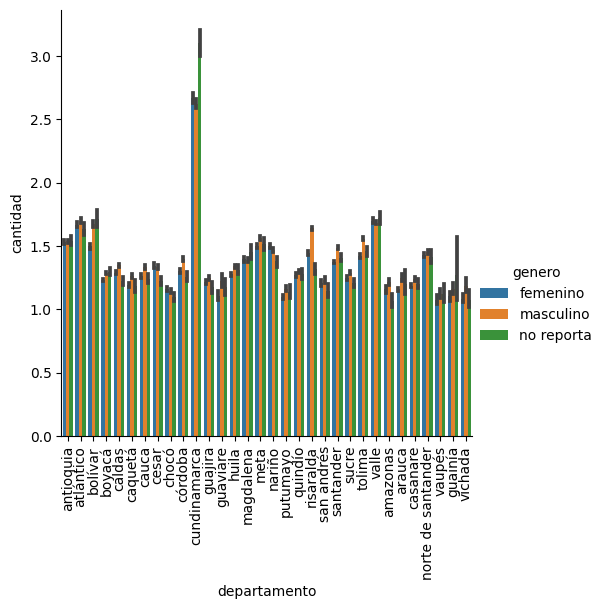

In [104]:
sns.catplot(data=df, x="departamento", y='cantidad',hue="genero",kind='bar')
plt.xticks(rotation=90)
plt.show()